In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif,chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score
import joblib
#warnings
import warnings
warnings.filterwarnings('ignore')

#***Load The Dataset:-***

In [269]:
#load dataset
df=pd.read_csv('/content/appendix_cancer_prediction_dataset.csv')

In [270]:
df.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,NaN,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No


In [271]:
#shape
df.shape

(260000, 25)

#***Explotary Data Analysis:-***

In [272]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Patient_ID                      260000 non-null  object 
 1   Country                         260000 non-null  object 
 2   Age                             260000 non-null  int64  
 3   Gender                          260000 non-null  object 
 4   BMI                             260000 non-null  float64
 5   Smoking_Status                  260000 non-null  object 
 6   Alcohol_Consumption             260000 non-null  object 
 7   Family_History_Cancer           260000 non-null  object 
 8   Genetic_Mutations               260000 non-null  object 
 9   Chronic_Diseases                129913 non-null  object 
 10  Physical_Activity_Level         260000 non-null  object 
 11  Diet_Type                       260000 non-null  object 
 12  Radiation_Exposu

In [273]:
#check the describe
df.describe()

,Age,BMI,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Diagnosis_Delay_Days,Survival_Years_After_Diagnosis
count,260000.000000,260000.000000,260000.000000,260000.000000,260000.000000,260000.000000,260000.000000,260000.000000,260000.000000
mean,53.443331,24.996457,134.490342,224.477227,7.000596,4.999148,274.433846,365.181450,4.989499
std,20.750951,4.997116,25.961207,43.266553,1.496819,0.501531,72.207496,210.924211,4.976837
min,18.000000,1.100000,90.000000,150.000000,0.500000,2.800000,150.000000,0.000000,0.000000
25%,36.000000,21.600000,112.000000,187.000000,6.000000,4.700000,212.000000,182.000000,1.400000
50%,53.000000,25.000000,134.000000,224.000000,7.000000,5.000000,275.000000,366.000000,3.500000
75%,71.000000,28.400000,157.000000,262.000000,8.000000,5.300000,337.000000,548.000000,6.900000
max,89.000000,48.100000,179.000000,299.000000,13.700000,7.600000,399.000000,729.000000,67.800000


In [274]:
#drop the patient_id
df.drop('Patient_ID', axis=1, inplace=True)

In [275]:
#check the missing values
df.isnull().sum()

,0
Country,0
Age,0
Gender,0
BMI,0
Smoking_Status,0
Alcohol_Consumption,0
Family_History_Cancer,0
Genetic_Mutations,0
Chronic_Diseases,130087
Physical_Activity_Level,0


***Treating Missing Values:-***

In [276]:
# Fill missing Chronic_Diseases with "None" (assuming missing means no disease)
df["Chronic_Diseases"].fillna("None", inplace=True)

In [277]:
df['Chronic_Diseases'].value_counts()

,count
Chronic_Diseases,
None,130087
Hypertension,77831
Diabetes,52082


In [278]:
# Fill missing Treatment_Type with "None" (assuming missing means no disease)
df["Treatment_Type"].fillna("None", inplace=True)

In [279]:
df['Treatment_Type'].value_counts()

,count
Treatment_Type,
Surgery,103398
Chemotherapy,78269
Radiation,52259
None,26074


In [280]:
#check the missing values
df.isnull().sum()

,0
Country,0
Age,0
Gender,0
BMI,0
Smoking_Status,0
Alcohol_Consumption,0
Family_History_Cancer,0
Genetic_Mutations,0
Chronic_Diseases,0
Physical_Activity_Level,0


In [281]:
#drop remaning misssing values
df.dropna(inplace=True)

In [282]:
#check missing values
df.isnull().sum().any()

False

In [283]:
#check the duplicated rows
df.duplicated().sum()

0

In [284]:
cate_col=df.select_dtypes(include='object').columns
cate_col

Index(['Country', 'Gender', 'Smoking_Status', 'Alcohol_Consumption',
       'Family_History_Cancer', 'Genetic_Mutations', 'Chronic_Diseases',
       'Physical_Activity_Level', 'Diet_Type', 'Radiation_Exposure',
       'Previous_Cancers', 'Tumor_Markers', 'Symptom_Severity',
       'Treatment_Type', 'Appendix_Cancer_Prediction'],
      dtype='object')

In [285]:
num_col=df.select_dtypes(exclude='object').columns
num_col

Index(['Age', 'BMI', 'Blood_Pressure', 'Cholesterol_Level',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Platelet_Count',
       'Diagnosis_Delay_Days', 'Survival_Years_After_Diagnosis'],
      dtype='object')

In [286]:
#saved the cleaned dataset in to csv file
df.to_csv('cleaned_Appendix_dataset.csv', index=False)

#***Data Visualization:-***

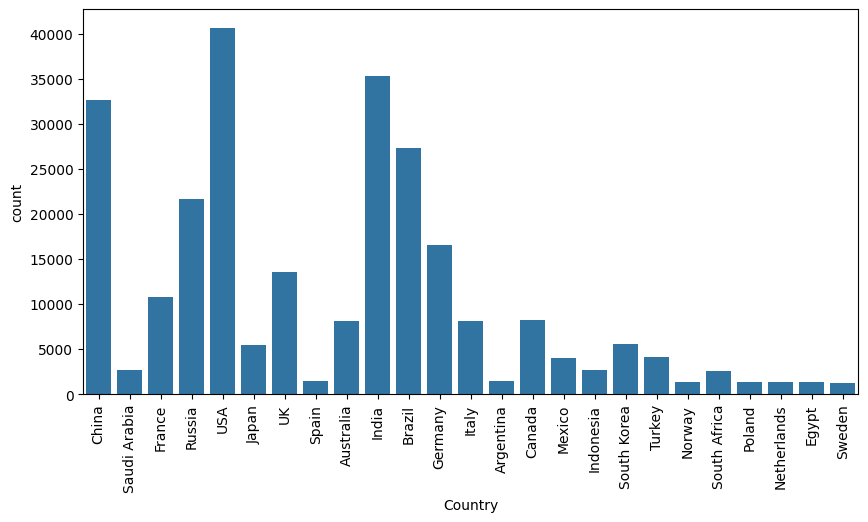

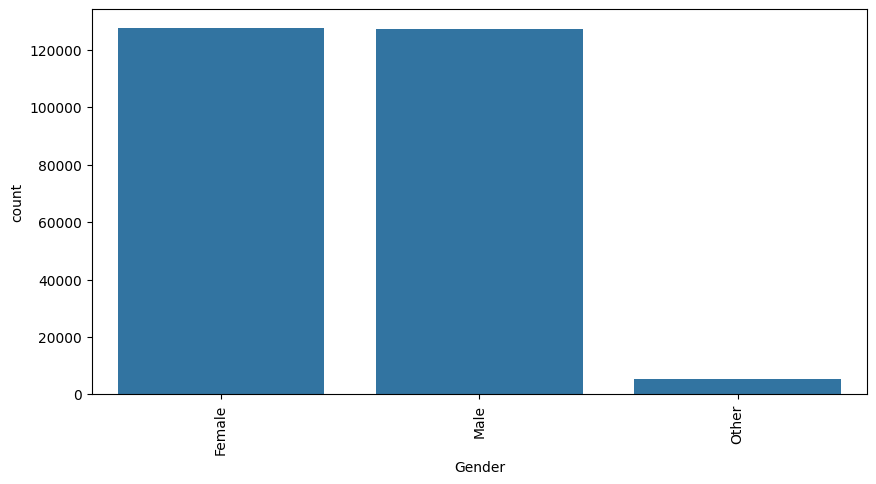

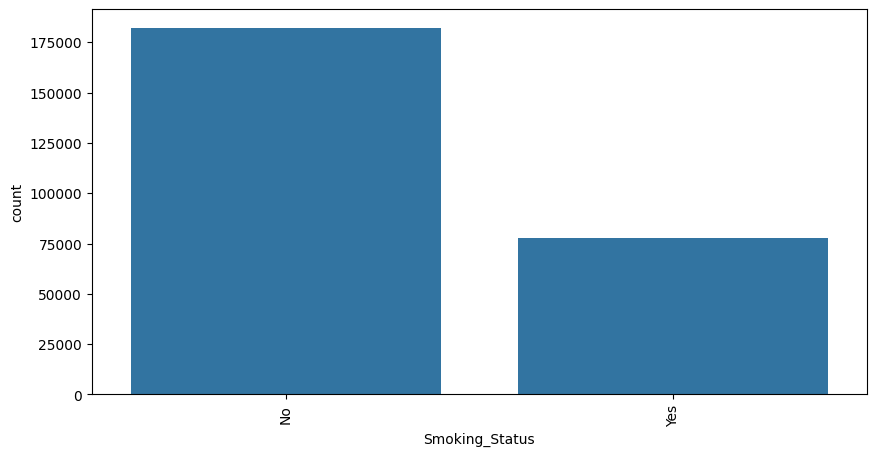

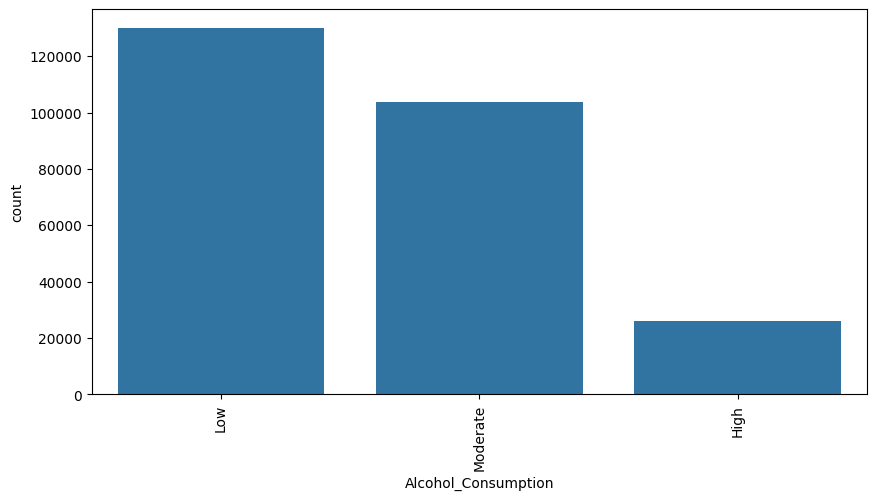

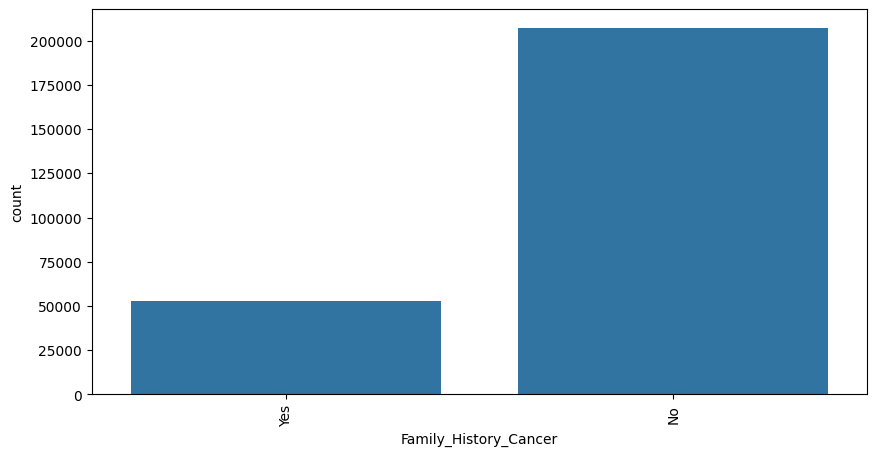

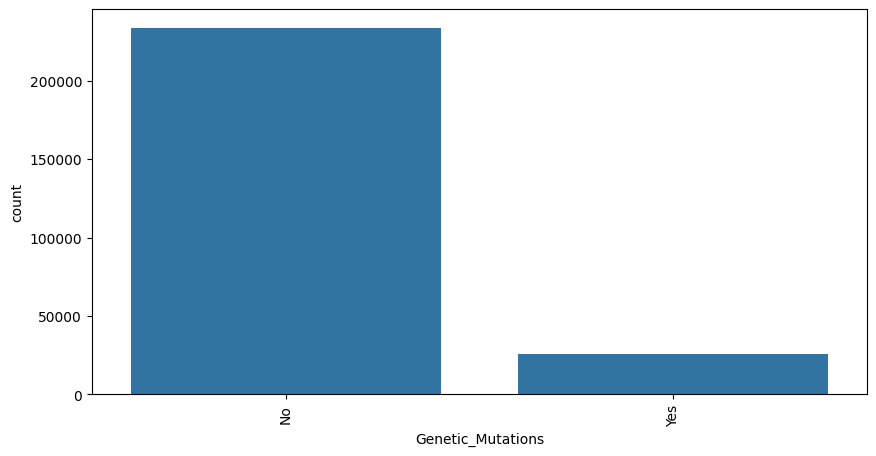

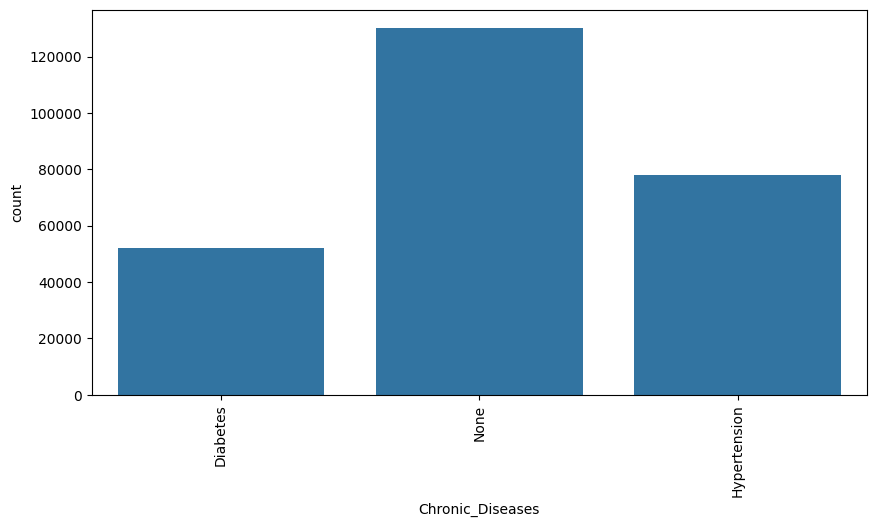

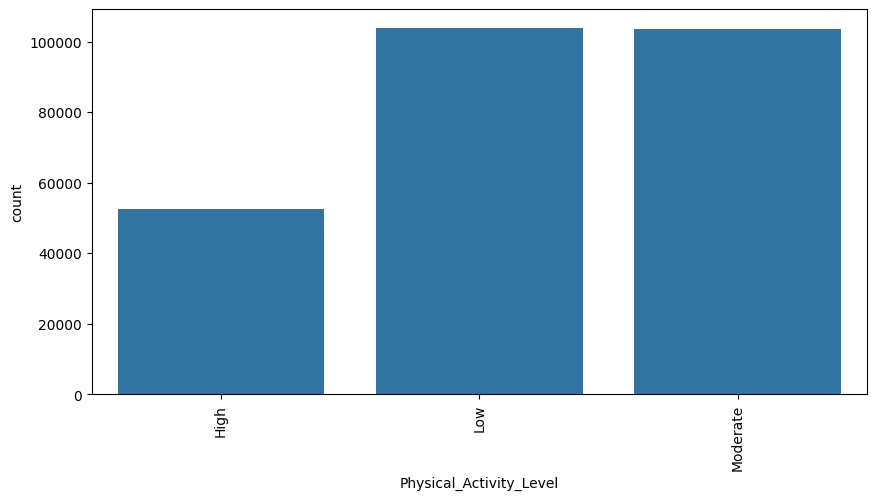

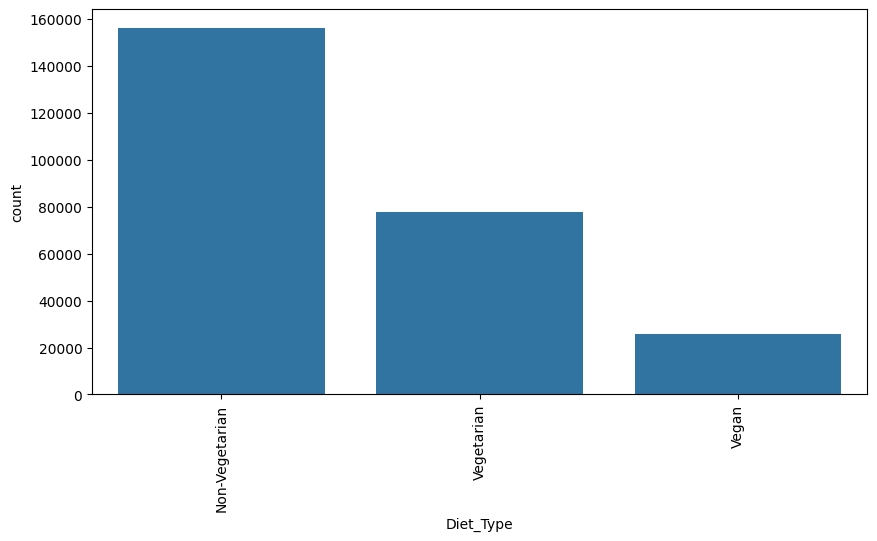

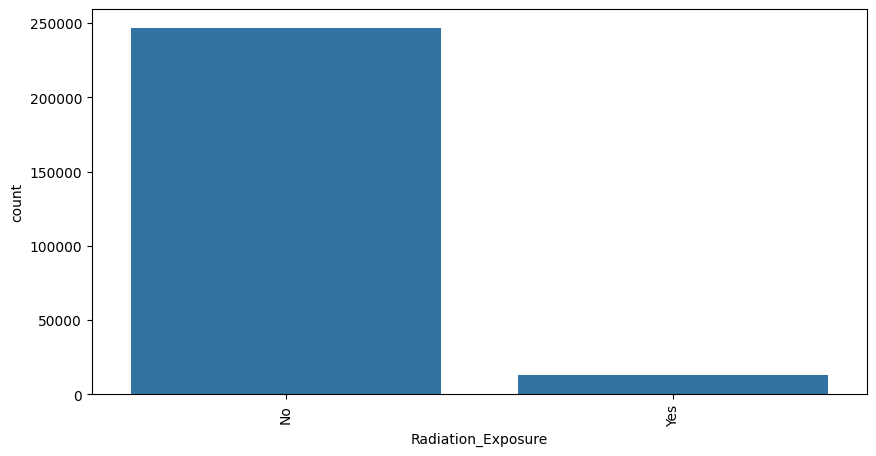

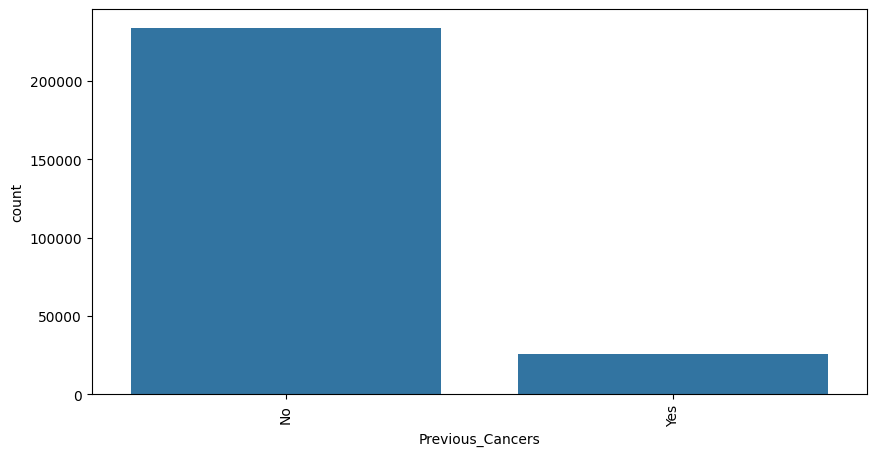

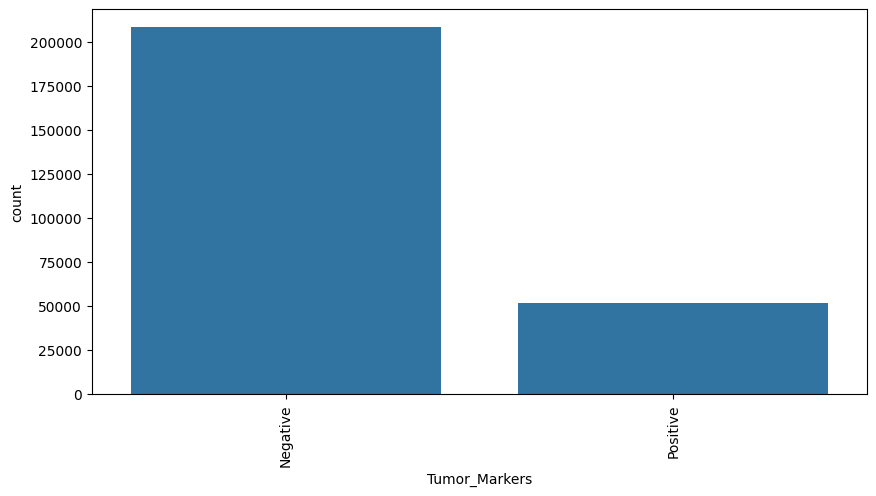

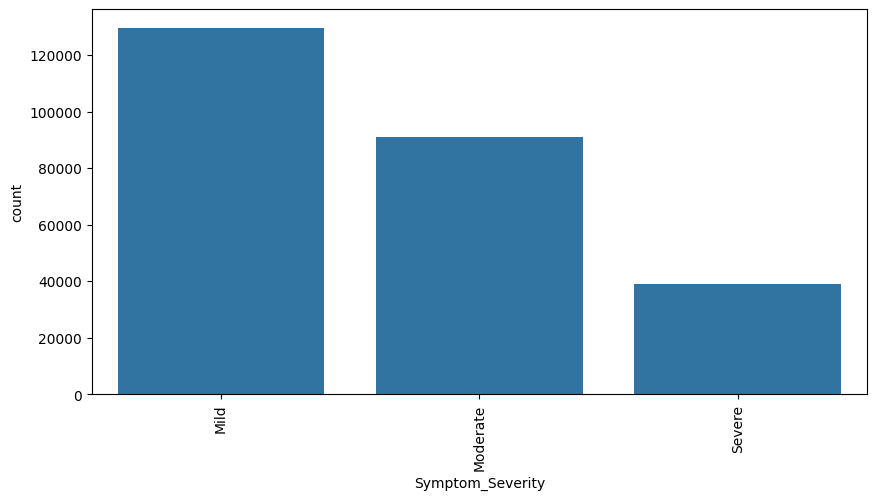

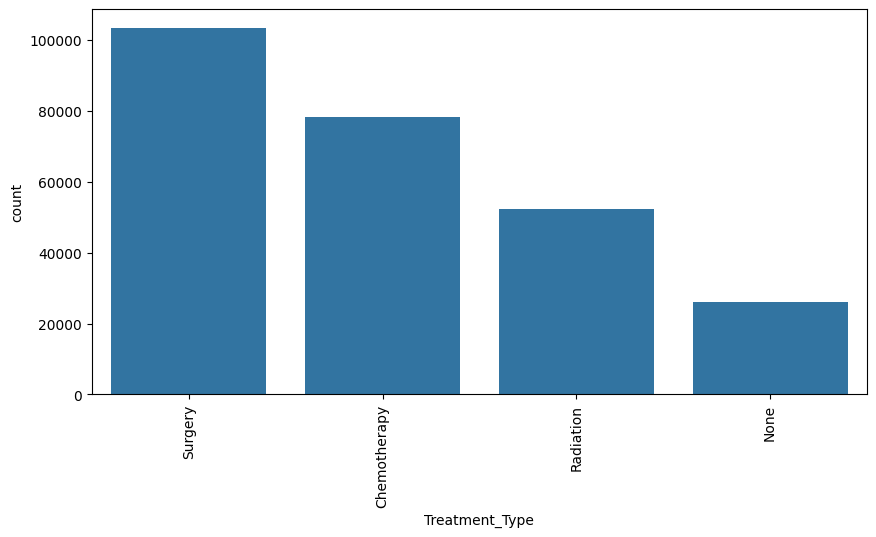

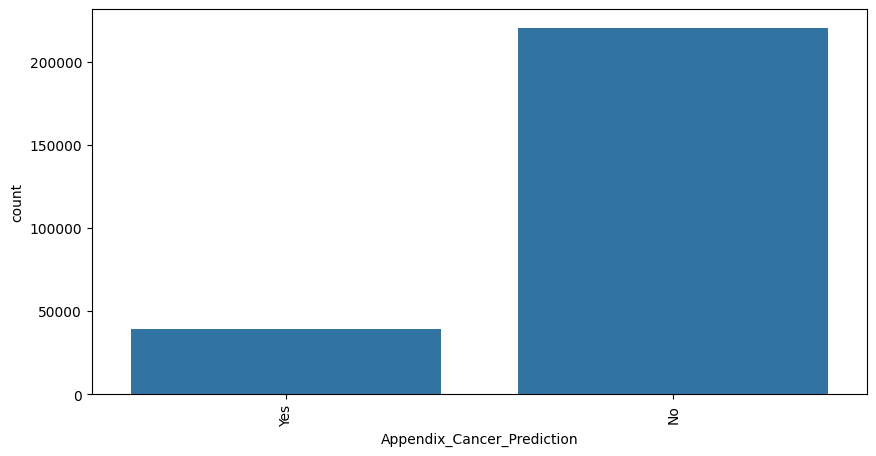

In [287]:
#data visualization
for col in cate_col:
  plt.figure(figsize=(10, 5))
  sns.countplot(x=col, data=df)
  plt.xticks(rotation=90)
  plt.show()

***data visualization with compare to target column***

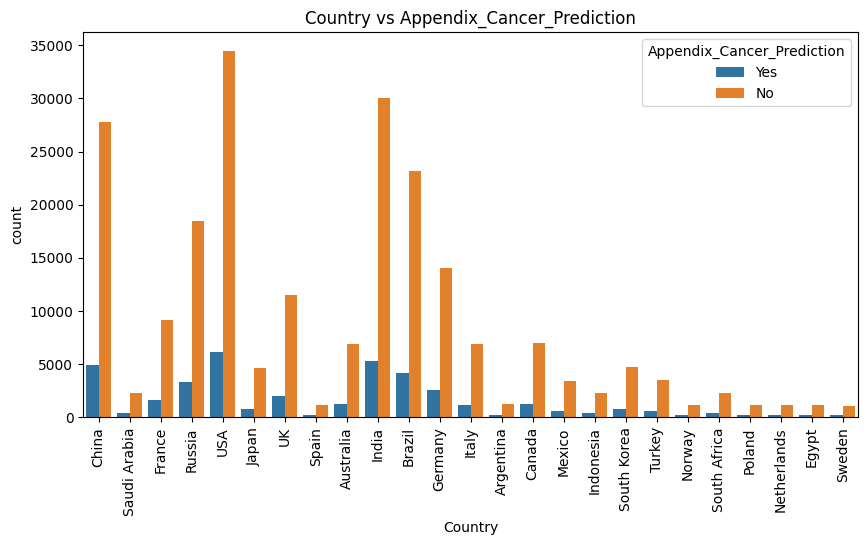

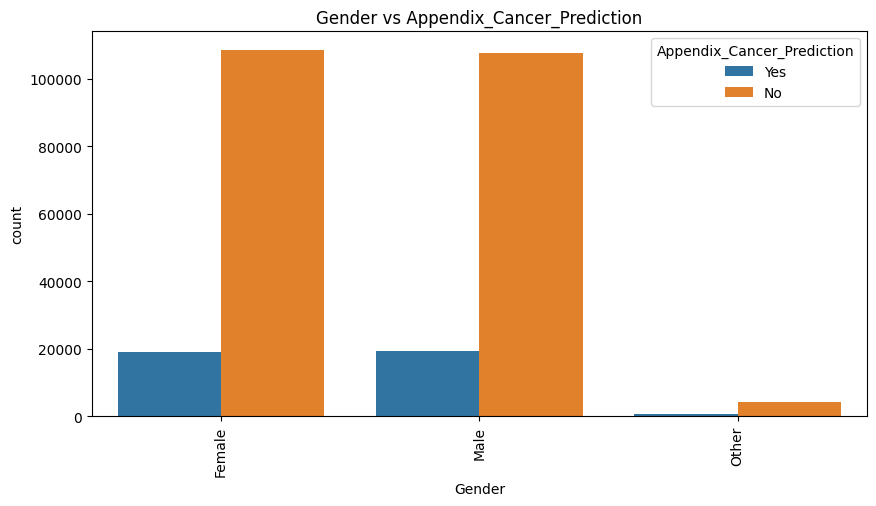

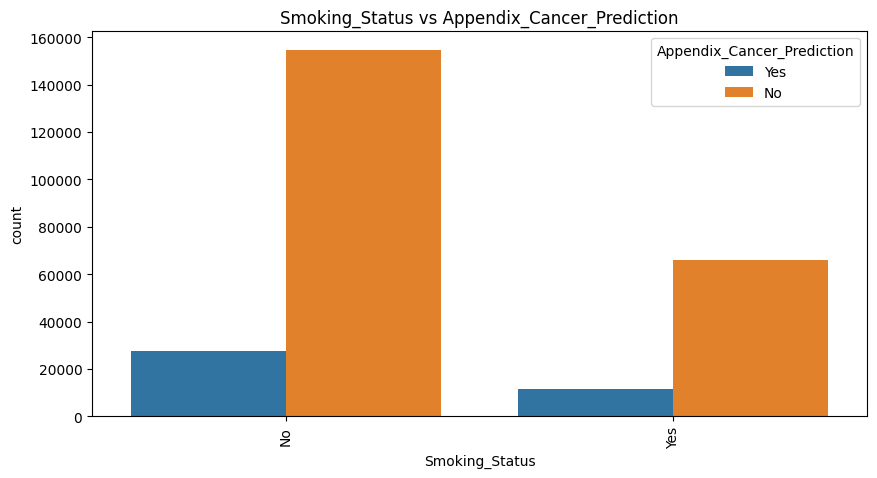

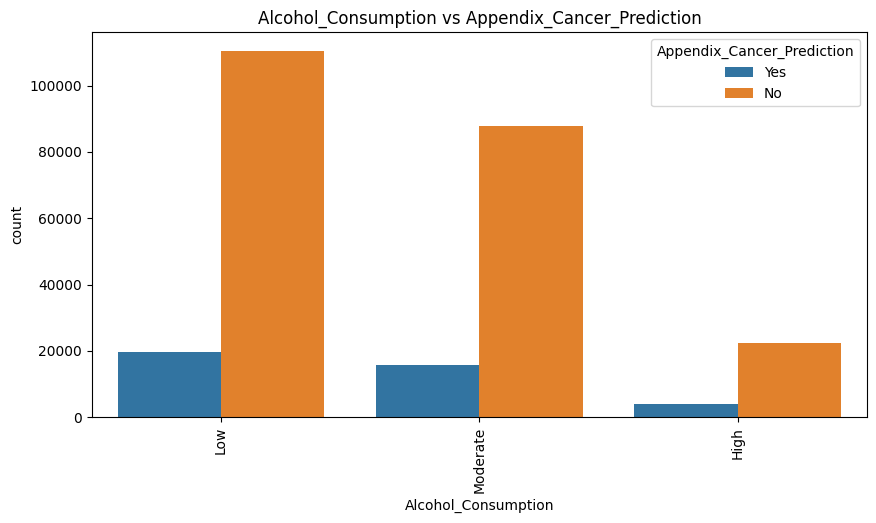

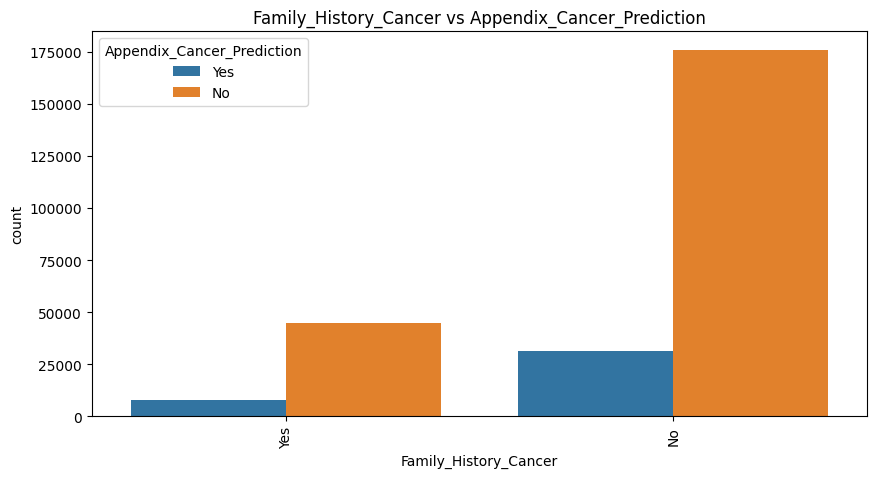

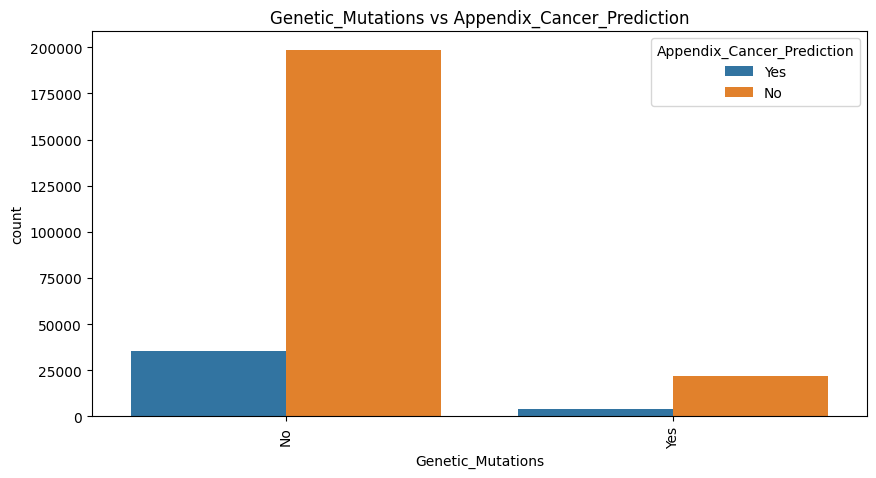

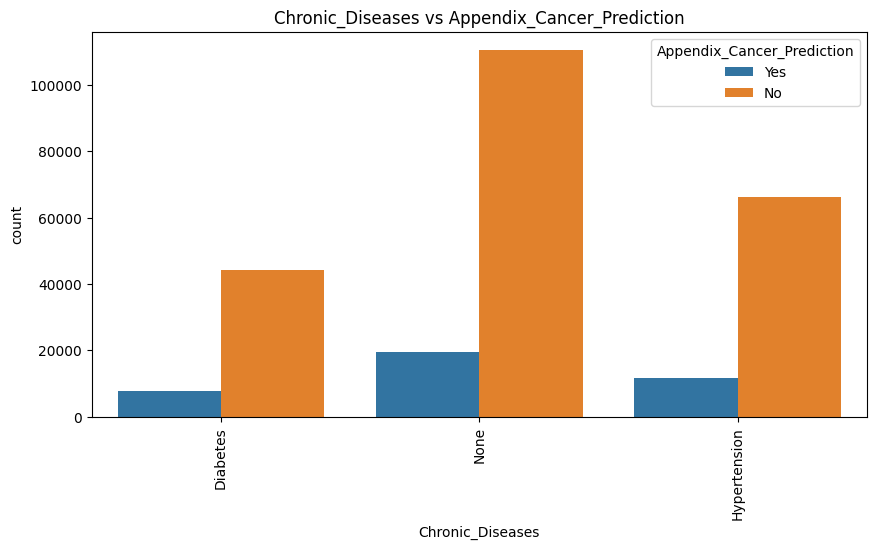

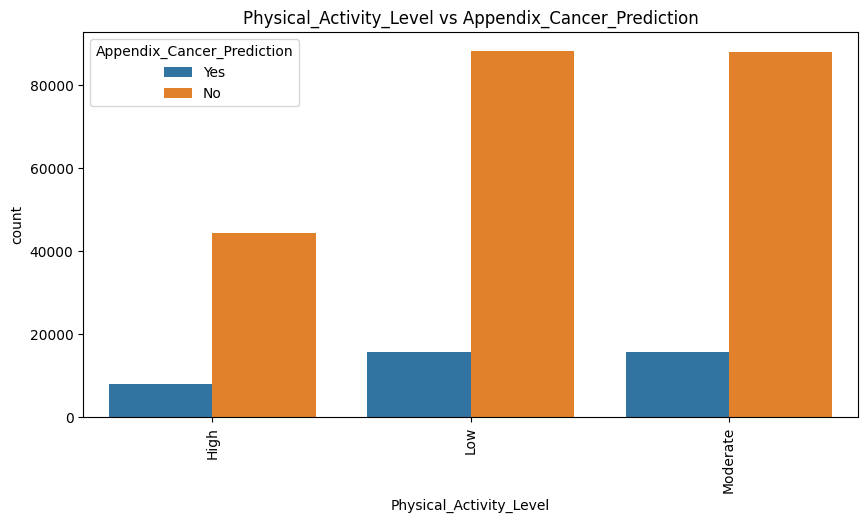

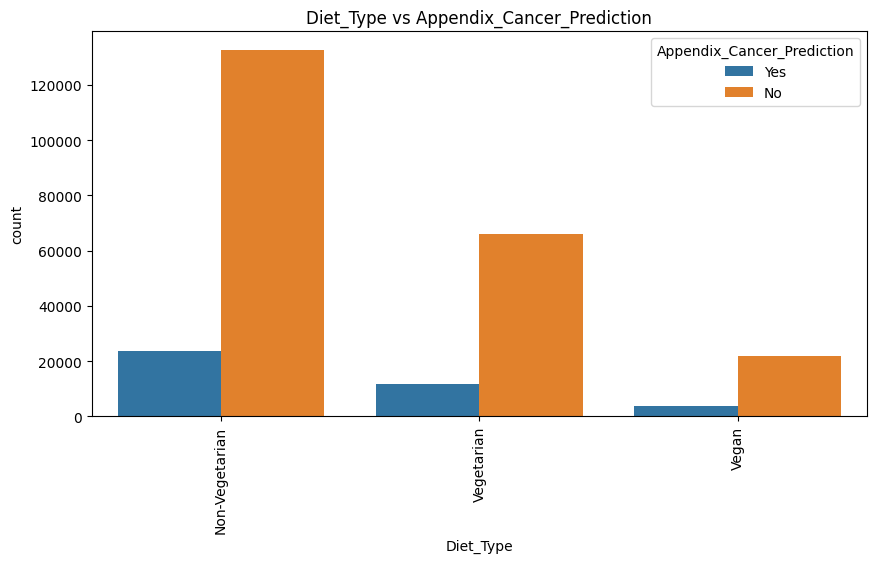

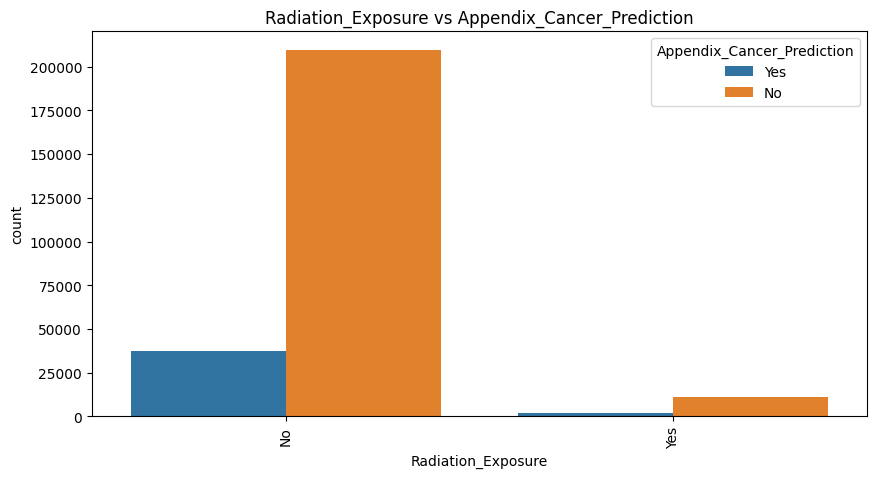

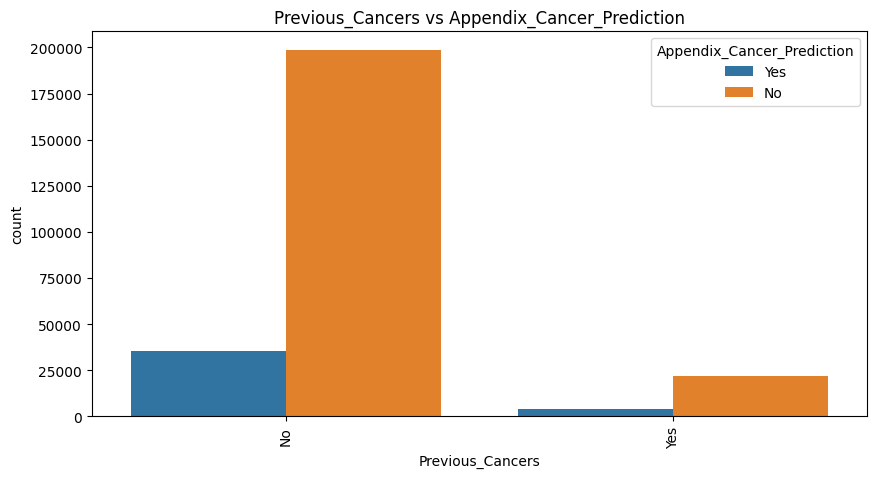

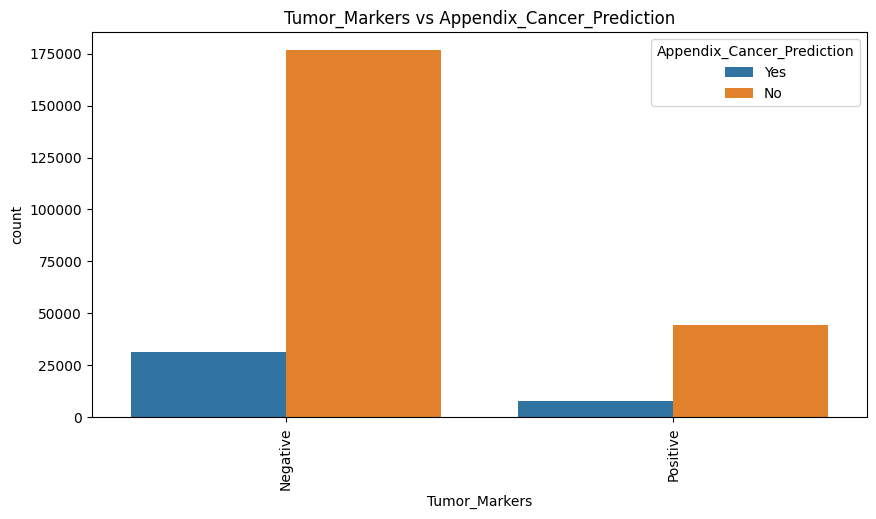

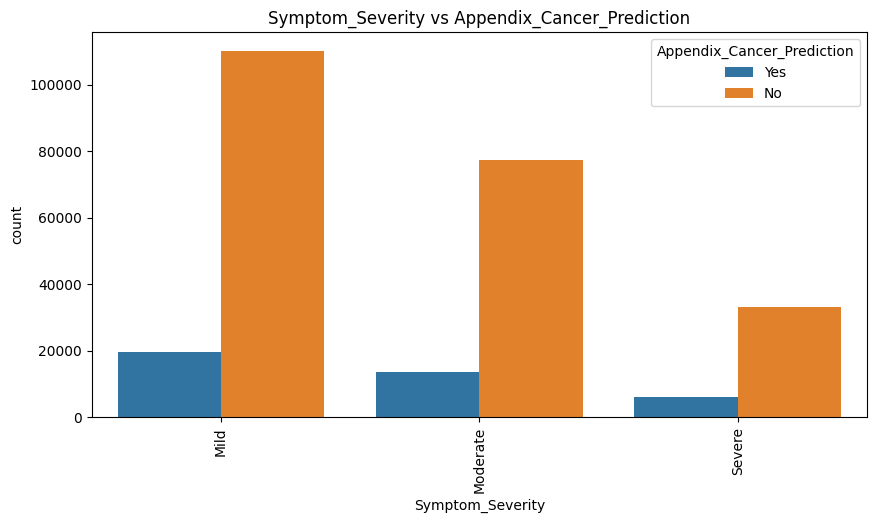

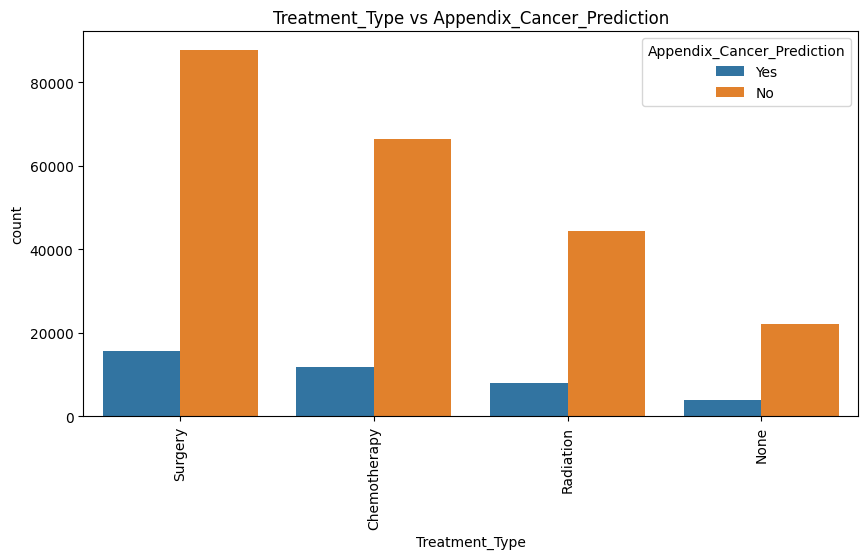

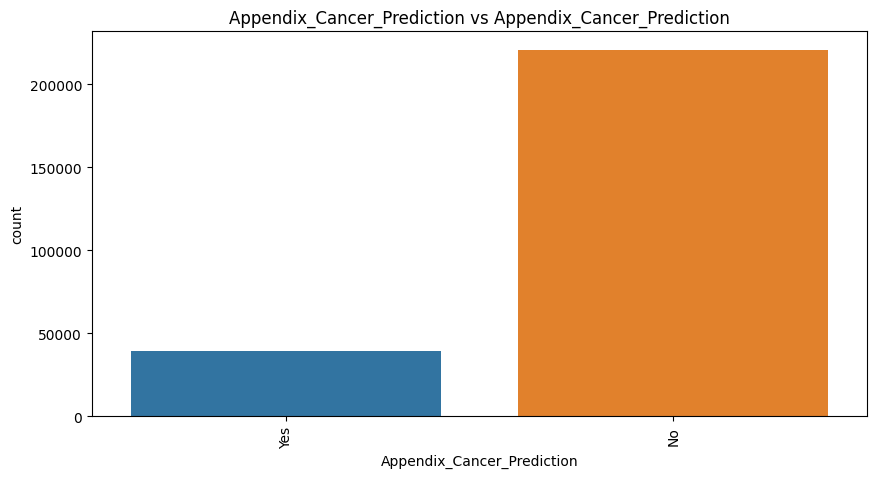

In [288]:
#data visualization with compare to target column
for col in cate_col:
  plt.figure(figsize=(10, 5))
  sns.countplot(x=col, hue='Appendix_Cancer_Prediction', data=df)
  plt.xticks(rotation=90)
  plt.title(f"{col} vs Appendix_Cancer_Prediction")
  plt.show()

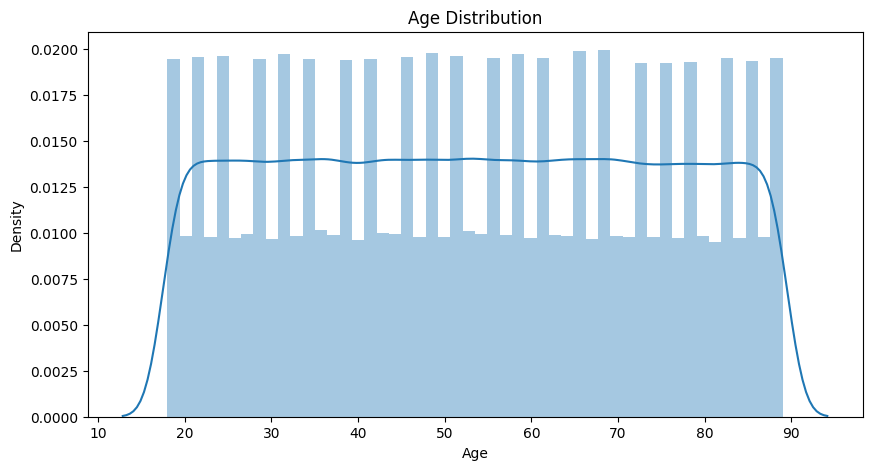

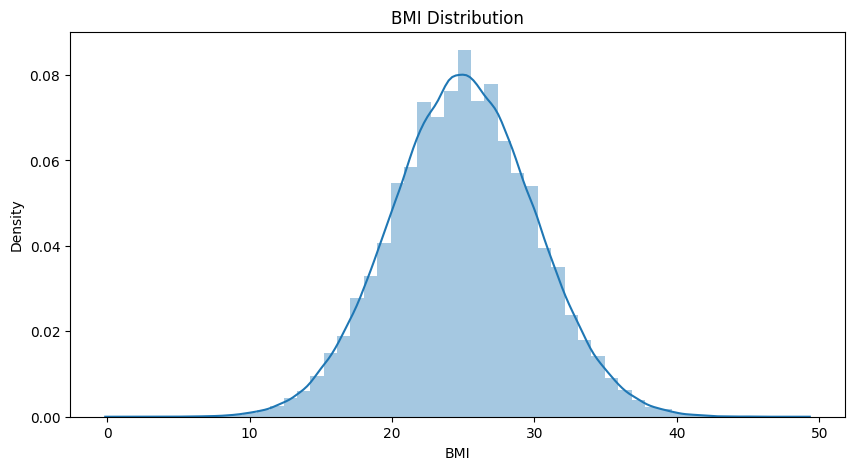

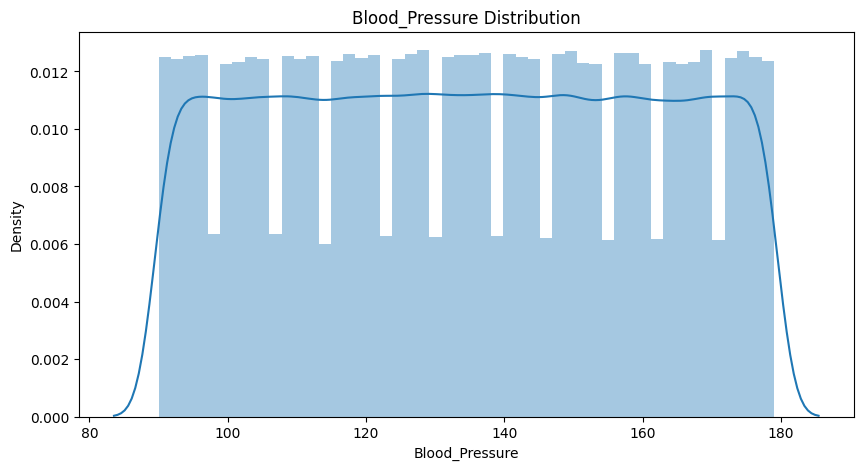

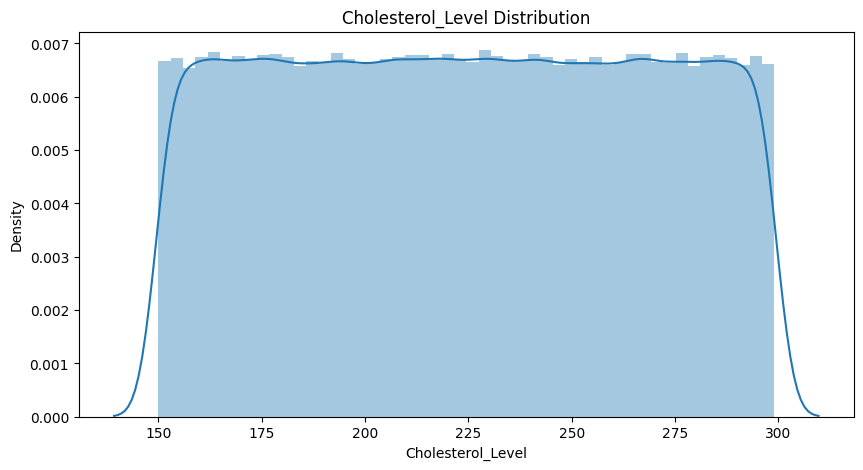

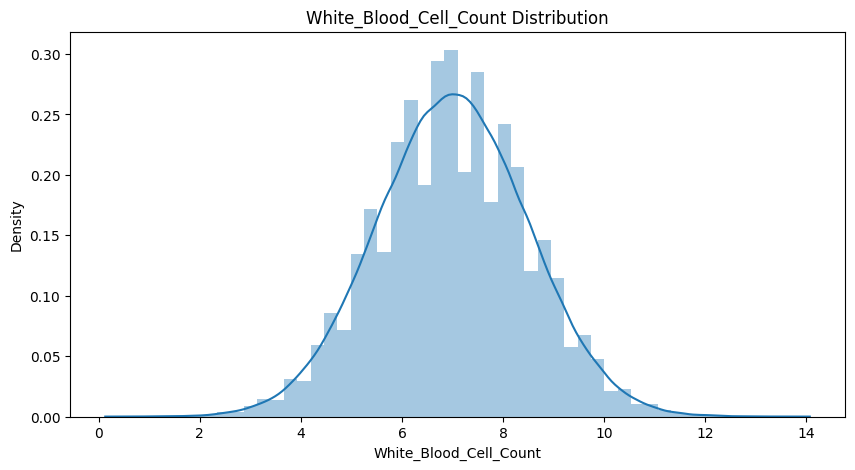

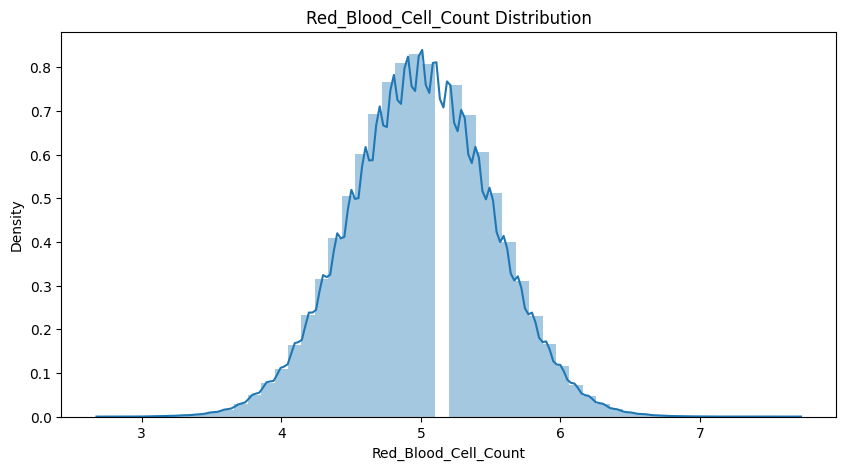

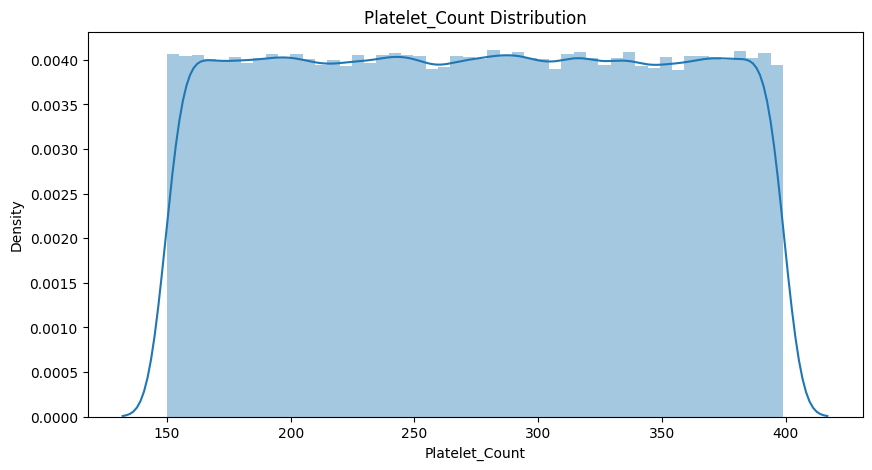

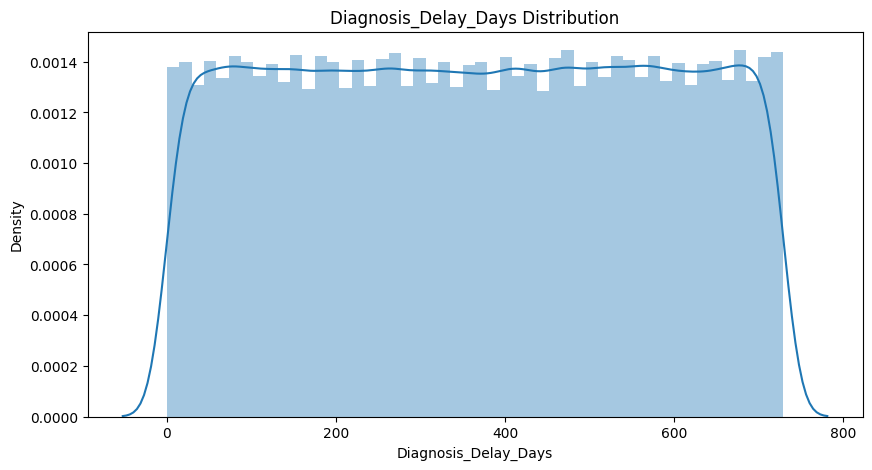

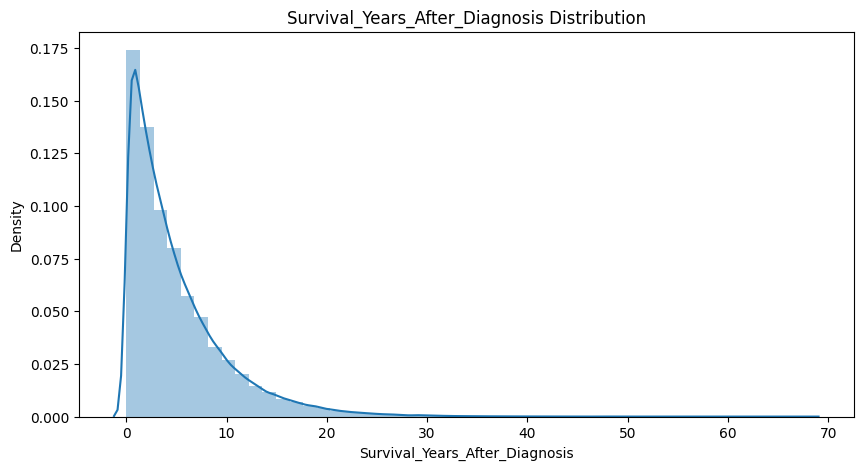

In [289]:
#data visualization on numerical column
for col in num_col:
  plt.figure(figsize=(10, 5))
  sns.distplot(df[col])
  plt.title(f"{col} Distribution")
  plt.show()

***drop the unncessary column:-***

In [290]:
df.columns

Index(['Country', 'Age', 'Gender', 'BMI', 'Smoking_Status',
       'Alcohol_Consumption', 'Family_History_Cancer', 'Genetic_Mutations',
       'Chronic_Diseases', 'Physical_Activity_Level', 'Diet_Type',
       'Radiation_Exposure', 'Previous_Cancers', 'Blood_Pressure',
       'Cholesterol_Level', 'White_Blood_Cell_Count', 'Red_Blood_Cell_Count',
       'Platelet_Count', 'Tumor_Markers', 'Symptom_Severity',
       'Diagnosis_Delay_Days', 'Treatment_Type',
       'Survival_Years_After_Diagnosis', 'Appendix_Cancer_Prediction'],
      dtype='object')

In [291]:
#drop unncessary column
df.drop(columns=['Country','Diagnosis_Delay_Days','Survival_Years_After_Diagnosis'], axis=1, inplace=True)

In [292]:
cate_col1=df.select_dtypes(include='object').columns
cate_col1

Index(['Gender', 'Smoking_Status', 'Alcohol_Consumption',
       'Family_History_Cancer', 'Genetic_Mutations', 'Chronic_Diseases',
       'Physical_Activity_Level', 'Diet_Type', 'Radiation_Exposure',
       'Previous_Cancers', 'Tumor_Markers', 'Symptom_Severity',
       'Treatment_Type', 'Appendix_Cancer_Prediction'],
      dtype='object')

In [293]:
#copy dataset
df2=df.copy()

#***Label Encoding:-***

In [294]:
#convet the ctegorical column to numerical column
encoder={}
for col in cate_col1:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])
  encoder[col]=le

#***Correlation:-***

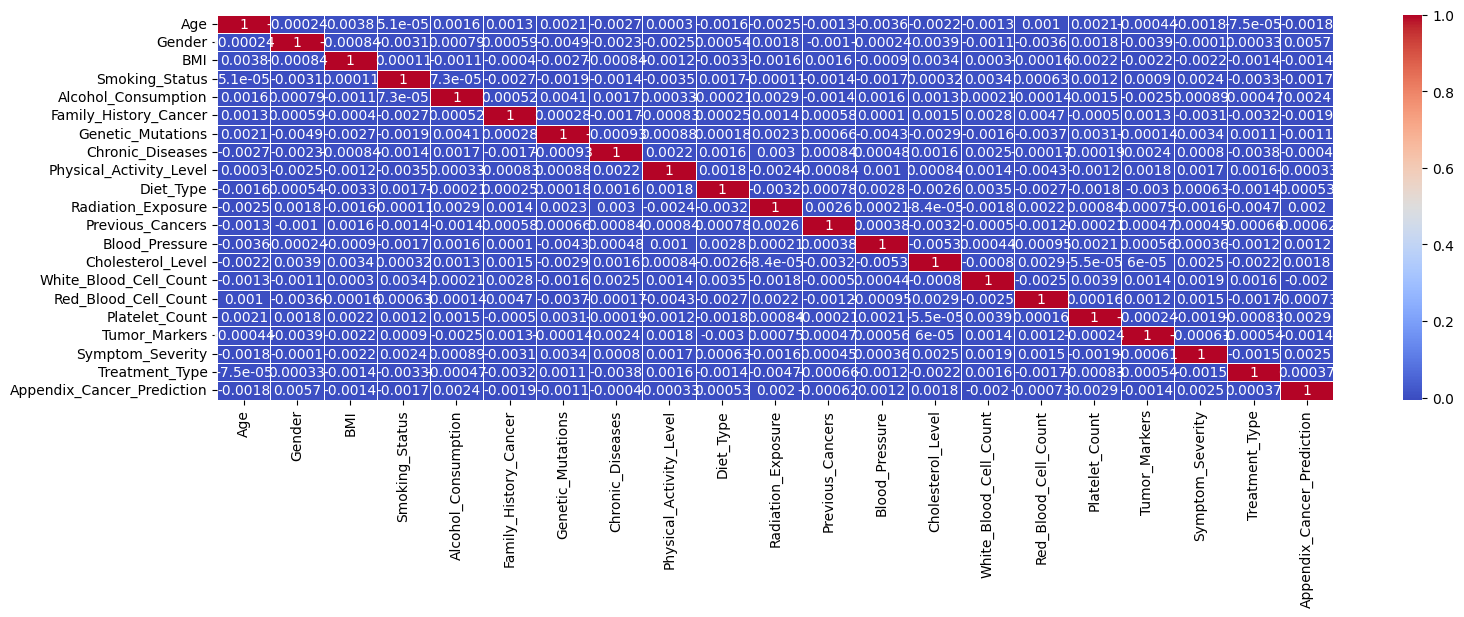

In [295]:
corr=df.corr()
corr
#correlation features
plt.figure(figsize=(18, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.7)
plt.show()

#***split the X,y:-***

In [296]:
X=df.drop('Appendix_Cancer_Prediction', axis=1)
y=df['Appendix_Cancer_Prediction']

In [297]:
y.value_counts()

,count
Appendix_Cancer_Prediction,
0,220713
1,39287


In [298]:
#balance the the target column
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
X, y= ros.fit_resample(X, y)

In [299]:
y.value_counts()

,count
Appendix_Cancer_Prediction,
1,220713
0,220713


#***Feature Selection:-***

In [300]:
chi_selector = SelectKBest(score_func=chi2, k=15)
X_new = chi_selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[chi_selector.get_support()]
print(selected_features)

Index(['Age', 'Gender', 'BMI', 'Smoking_Status', 'Alcohol_Consumption',
       'Family_History_Cancer', 'Diet_Type', 'Radiation_Exposure',
       'Previous_Cancers', 'Blood_Pressure', 'Cholesterol_Level',
       'White_Blood_Cell_Count', 'Platelet_Count', 'Tumor_Markers',
       'Symptom_Severity'],
      dtype='object')


In [301]:
rfc=RandomForestClassifier()
rfc.fit(X, y)

RandomForestClassifier()

In [302]:
# Create a DataFrame with feature importances
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Select top 15 features
top_features = feature_importance.head(20)['Feature'].tolist()
top_features

['Platelet_Count',
 'BMI',
 'Cholesterol_Level',
 'Blood_Pressure',
 'White_Blood_Cell_Count',
 'Age',
 'Red_Blood_Cell_Count',
 'Treatment_Type',
 'Physical_Activity_Level',
 'Chronic_Diseases',
 'Alcohol_Consumption',
 'Symptom_Severity',
 'Diet_Type',
 'Smoking_Status',
 'Family_History_Cancer',
 'Tumor_Markers',
 'Gender',
 'Previous_Cancers',
 'Genetic_Mutations',
 'Radiation_Exposure']

In [303]:
#drop column as per feature selection and using some of background knowledge in appendix cancer
X.drop(columns=['Physical_Activity_Level','Gender','Treatment_Type','Genetic_Mutations','Chronic_Diseases','Radiation_Exposure','Previous_Cancers'],inplace=True)

In [304]:
encoder

{'Gender': LabelEncoder(),
 'Smoking_Status': LabelEncoder(),
 'Alcohol_Consumption': LabelEncoder(),
 'Family_History_Cancer': LabelEncoder(),
 'Genetic_Mutations': LabelEncoder(),
 'Chronic_Diseases': LabelEncoder(),
 'Physical_Activity_Level': LabelEncoder(),
 'Diet_Type': LabelEncoder(),
 'Radiation_Exposure': LabelEncoder(),
 'Previous_Cancers': LabelEncoder(),
 'Tumor_Markers': LabelEncoder(),
 'Symptom_Severity': LabelEncoder(),
 'Treatment_Type': LabelEncoder(),
 'Appendix_Cancer_Prediction': LabelEncoder()}

In [305]:
dropped_columns=['Physical_Activity_Level','Gender','Treatment_Type','Genetic_Mutations','Chronic_Diseases','Radiation_Exposure','Previous_Cancers']

In [306]:
# Remove encoders for the dropped columns
filtered_encoders = {col: encoder[col] for col in encoder if col not in dropped_columns}

In [307]:
filtered_encoders

{'Smoking_Status': LabelEncoder(),
 'Alcohol_Consumption': LabelEncoder(),
 'Family_History_Cancer': LabelEncoder(),
 'Diet_Type': LabelEncoder(),
 'Tumor_Markers': LabelEncoder(),
 'Symptom_Severity': LabelEncoder(),
 'Appendix_Cancer_Prediction': LabelEncoder()}

In [308]:
X.shape

(441426, 13)

In [309]:
X.columns

Index(['Age', 'BMI', 'Smoking_Status', 'Alcohol_Consumption',
       'Family_History_Cancer', 'Diet_Type', 'Blood_Pressure',
       'Cholesterol_Level', 'White_Blood_Cell_Count', 'Red_Blood_Cell_Count',
       'Platelet_Count', 'Tumor_Markers', 'Symptom_Severity'],
      dtype='object')

#***Split Into Train and Test:-***

In [310]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [311]:
#shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((353140, 13), (88286, 13), (353140,), (88286,))

#***Building the model:-***

In [312]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     43888
           1       1.00      0.99      1.00     44398

    accuracy                           1.00     88286
   macro avg       1.00      1.00      1.00     88286
weighted avg       1.00      1.00      1.00     88286



In [313]:
Accuracy=accuracy_score(y_test, y_pred_rf)
print(Accuracy)

0.9955712117436513


In [314]:
roc_auc = roc_auc_score(y_test, y_pred_rf)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9955956015596635


***check the overfitting:-***\
📌 If Train Accuracy ≫ Test Accuracy, the model is overfitting.

In [315]:
print("Train Accuracy:", rf.score(X_train, y_train))
print("Test Accuracy:", rf.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.9955712117436513


In [316]:
print("Train AUC:", roc_auc_score(y_train, rf.predict_proba(X_train)[:,1]))
print("Test AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Train AUC: 1.0
Test AUC: 0.9957424900426342


#***Save The Model:-***

In [317]:
#save the models
joblib.dump(rf, 'model.pkl')

['model.pkl']

In [318]:
#save the encoder model
joblib.dump(filtered_encoders, 'encoder.pkl')

['encoder.pkl']

In [319]:
import joblib

model = joblib.load("model.pkl")
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
